In [27]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   Speaker                                            Message Sentiment
0  Human 1                                                Hi!   Neutral
1  Human 2                     What is your favorite holiday?  Positive
2  Human 1  one where I get to meet lots of different people.   Neutral
3  Human 2  What was the most number of people you have ev...  Positive
4  Human 1                    Hard to keep a count. Maybe 25.  Negative


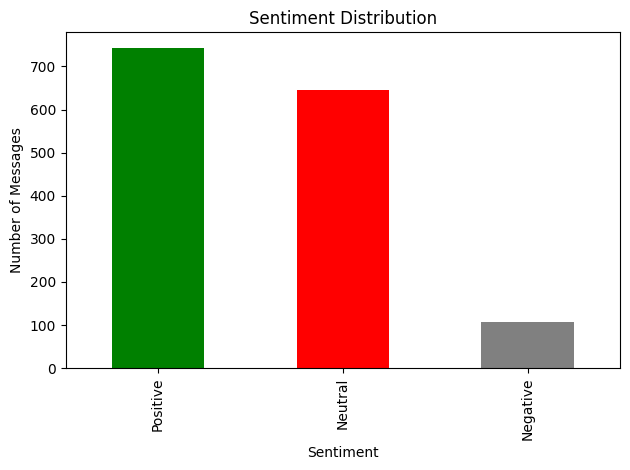

In [28]:
import re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# 1. Load the text file
with open("human_chat.txt", "r", encoding="utf-8") as file:
    chat = file.read()

# 2. Extract dialogue lines
dialogues = re.findall(r"(Human \d): (.+)", chat)
df = pd.DataFrame(dialogues, columns=["Speaker", "Message"])

# 3. Analyze sentiment using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Message"].apply(get_sentiment)

# 4. Display sample results
print(df.head())

# 5. Plot sentiment distribution
df["Sentiment"].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.show()
